In [1]:
reslist = list()
with open('./results_table.txt', 'r') as res:
    for line in res:
        l = line.strip().split()
        reslist.append(l)

In [2]:
import pandas as pd

restable = pd.DataFrame(reslist[1:], columns = reslist[0])
restable = restable.set_index('aa')

restable = restable.astype('int32')
# restable.dtypes

In [3]:
def CountPropensity(n_ik, n_i, N_k, N):
    return (n_ik/n_i) / (N_k/N) 

propensity_table = [['aa', 'H', 'E', 'C']]

N = restable.sum().sum()
for aa in restable.T:
    new_list = [aa]
    for struct in restable:
        n_ik = restable.T[aa][struct]
        n_i = restable.T[aa].sum()
        N_k = restable[struct].sum()
        new_list.append(CountPropensity(n_ik, n_i, N_k, N))
    propensity_table.append(new_list)

In [4]:
propensity = pd.DataFrame(propensity_table[1:], columns=propensity_table[0])
propensity = propensity.set_index('aa')

In [5]:
propensity.sort_values('E')

H         E         C
aa                              
P   0.304596  0.298540  1.865062
N   0.901160  0.362761  1.354551
E   1.298496  0.593779  0.933424
D   0.950859  0.618997  1.203927
G   0.450411  0.682359  1.581676
Q   1.313555  0.705027  0.873305
K   1.168179  0.711729  0.988081
A   1.451104  0.744600  0.744927
S   0.723898  0.911926  1.261415
R   1.121771  0.916225  0.937536
M   1.340221  1.039916  0.707437
L   1.392814  1.046596  0.661992
H   0.939544  1.049456  1.027623
W   1.006490  1.181722  0.916453
T   0.721200  1.281586  1.104333
C   0.665685  1.316349  1.134288
Y   0.928241  1.426713  0.874232
F   1.073247  1.432537  0.754359
I   1.035454  1.926462  0.572142
V   0.871216  2.027690  0.661457

In [6]:
propensity['H'].median()

0.9786744479589577

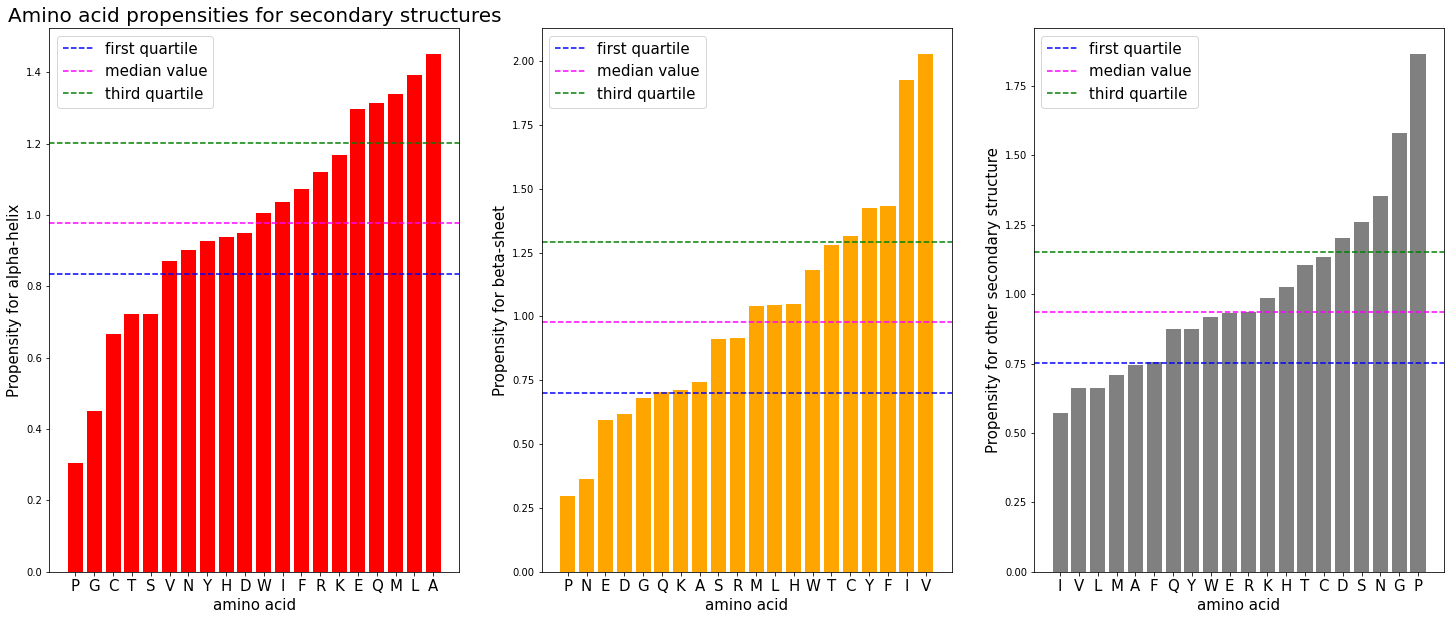

In [7]:
import matplotlib.pyplot as plt
import numpy as np



plt.figure(figsize=(25, 10))
plt.subplot(1, 3, 1)

plt.title('Amino acid propensities for secondary structures', fontsize=20)

colors = ['red', 'orange', 'gray']
titles = ['alpha-helix', 'beta-sheet', 'other secondary structure']
for struct_ind, struct in enumerate(['H', 'E', 'C']):
    propensity = propensity.sort_values(struct)
    plt.subplot(1, 3, struct_ind + 1)
    plt.bar(np.array(propensity.T.columns), np.array(propensity[struct]), color=colors[struct_ind])
    plt.xlabel('amino acid', fontsize=15)
    plt.ylabel('Propensity for ' + titles[struct_ind], fontsize=15)

    plt.xticks(size=15)
    # plt.xlim(2,11)
    # plt.ylim(0, 180)

#     plt.axvline(x=3.9, color = 'red', linestyle='--')
    plt.axhline(y=propensity[struct].quantile(0.25), color = 'blue', linestyle='--', label = 'first quartile')
    plt.axhline(y=propensity[struct].quantile(), color = 'magenta', linestyle='--', label = 'median value')
    plt.axhline(y=propensity[struct].quantile(0.75), color = 'green', linestyle='--', label = 'third quartile')
    plt.legend(fontsize=15)


plt.savefig("/home/joseph/Documents/FBB/1_Bioinformatics/prac8/t2/propensities.png",format = "png")
plt.show()